### Calculo de Ratios

#### liquidez
* Razón corriente = Activos corrientes / Pasivos corrientes
* Prueba ácida = (Activo corriente - Inventarios) / Pasivo corriente

#### Solvencia y endeudamiento
* Endeudamiento total = Total de pasivos / Total de activos
* Endeudamiento de largo plazo = Pasivo no corriente / Total de activos
* Cobertura de intereses = EBIT / Gastos por intereses

#### Rentabilidad
* ROA (Return on Assets) = Beneficio neto / Activo total
* ROE (Return on Equity) =  Beneficio neto / Patrimonio neto
* Margen de utilidad = 	Beneficio neto / Ventas (ingresos totales) (escrapeado "Margen del beneficio neto %")
* Rotación de activos = ingresos totales / Total de activos
* Rotación de inventarios = ingresos totales / Inventario

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Consultar datos
conn = sqlite3.connect('webmining.db')
cursor = conn.cursor()
cursor.execute("SELECT * FROM datos_anuales")
column_names = [description[0] for description in cursor.description]
filas = cursor.fetchall()

# Guardar los datos en un dataframe
df = pd.DataFrame(filas, columns=column_names)
df.loc[df["company"] == "ypf-sa", "company"] = "YPF"

In [2]:
indicadores = df.groupby(["informe","seccion","indicador"]).size()

print(indicadores)

informe     seccion           indicador                                                 
balance     activo_corriente  Crecimiento de efectivo y equivalentes                        125
                              Créditos totales                                              125
                              División financiera, préstamos y arrendamientos corrientes     20
                              División financiera, total de otros activos corrientes         15
                              Efectivo restringido                                           49
                                                                                           ... 
resultados                    Promedio ponderado diluido de acciones en circulación         125
                              Total de gastos de intereses                                  122
                              Total de otras partidas no habituales                          76
                              Total de otros ga

In [3]:
# rubros que componen cada seccion
# no se incluye por ejemplo el rubro "otros creditos" ya que forma parte de "Creditos totales"
activo_corriente = [
    "Efectivo y equivalentes",
    "Inversiones a corto plazo",
    "Créditos totales",
    "Inventario",
    "Gastos pagados por adelantado",
    "Otros activos corrientes"
]
activo_no_corriente = [
    "Planta, propiedad y equipo, neto",
    "Inversiones a largo plazo",
    "Activos intangibles",
    "Total de otros activos"
]
pasivo_corriente = [
    "Total de cuentas por pagar",
    "Total de gastos devengados",
    "Préstamos a corto plazo",
    "Parte actual de la deuda a largo plazo/arrendamientos",
    "Total de otros pasivos corrientes"
]
pasivo_no_corriente = [
    "Deuda a largo plazo",
    "Arrendamientos a largo plazo",
    "Total de otros pasivos"
]
patrimonio_neto = [
    "Total de acciones preferentes",
    "Acciones ordinarias y APIC",
    "Ganancias retenidas",
    "Acciones propias y otras",
    "Intereses minoritarios"
]

inventario = ["Inventario"]

EBIT = ["EBIT"]
	
intereses = ["Total de gastos de intereses"]

beneficio_neto = ["Beneficio neto"]

mbn = ["Margen del beneficio neto %"]

ing = ["Ingresos totales"]

In [4]:
# features de indicadores ya escrapeados

indicadores_scrapeados = [
  "Crecimiento de efectivo y equivalentes",
  "Crecimiento de activos totales",
  "Crecimiento del pasivo total",
  "Crecimiento de la deuda total",
  "Crecimiento del beneficio neto",
  "Crecimiento del EBITDA",
  "Crecimiento de los ingresos totales"
]

In [5]:
ac = pd.pivot_table(df[df.indicador.isin(activo_corriente)], index=["company","ejercicio"], values="valor",aggfunc="sum").rename(columns={"valor":"activo_corriente"})
anc = pd.pivot_table(df[df.indicador.isin(activo_no_corriente)], index=["company","ejercicio"], values="valor",aggfunc="sum").rename(columns={"valor":"activo_no_corriente"})
pc = pd.pivot_table(df[df.indicador.isin(pasivo_corriente)], index=["company","ejercicio"], values="valor",aggfunc="sum").rename(columns={"valor":"pasivo_corriente"})
pnc = pd.pivot_table(df[df.indicador.isin(pasivo_no_corriente)], index=["company","ejercicio"], values="valor",aggfunc="sum").rename(columns={"valor":"pasivo_no_corriente"})
pn = pd.pivot_table(df[df.indicador.isin(patrimonio_neto)], index=["company","ejercicio"], values="valor",aggfunc="sum").rename(columns={"valor":"patrimonio_neto"})
inv = pd.pivot_table(df[df.indicador.isin(inventario)], index=["company","ejercicio"], values="valor",aggfunc="sum").rename(columns={"valor":"inventario"})
ebit = pd.pivot_table(df[df.indicador.isin(EBIT)], index=["company","ejercicio"], values="valor",aggfunc="sum").rename(columns={"valor":"EBIT"})
int = pd.pivot_table(df[df.indicador.isin(intereses)], index=["company","ejercicio"], values="valor",aggfunc="sum").rename(columns={"valor":"intereses"})
bn = pd.pivot_table(df[df.indicador.isin(beneficio_neto)], index=["company","ejercicio"], values="valor",aggfunc="sum").rename(columns={"valor":"beneficio_neto"})
mbn = pd.pivot_table(df[df.indicador.isin(mbn)], index=["company","ejercicio"], values="valor",aggfunc="sum").rename(columns={"valor":"margen_beneficio_neto"})
ingt = pd.pivot_table(df[df.indicador.isin(ing)], index=["company","ejercicio"], values="valor",aggfunc="sum").rename(columns={"valor":"ingresos_totales"})

data = pd.concat([ac,anc,pc,pnc,pn,inv,ebit,int,bn,mbn,ingt], axis=1)
data.round(2)

activo_corriente  activo_no_corriente  pasivo_corriente  \
company  ejercicio                                                            
3m-co    2020                14975.0              32362.0            7948.0   
         2021                15403.0              31669.0            9035.0   
         2022                14688.0              31767.0            9523.0   
         2023                16379.0              34201.0           15297.0   
         2024                15884.0              23984.0           11256.0   
...                              ...                  ...               ...   
visa-inc 2020                27645.0              53274.0           14510.0   
         2021                27607.0              55289.0           15739.0   
         2022                30205.0              55296.0           20853.0   
         2023                33532.0              56967.0           23098.0   
         2024                34033.0              60478.0           26517.0   

                    pasivo_no_corriente  patrimonio_neto  inventario     EBIT  \
company  ejercicio                                                              
3m-co    2020                   26465.0          12927.0      4239.0   7156.0   
         2021                   22920.0          15109.0      4985.0   7754.0   
         2022                   22162.0          14756.0      5372.0   3348.0   
         2023                   30415.0           4852.0      3944.0   4281.0   
         2024                   24718.0           3879.0      3698.0   4290.0   
...                                 ...              ...         ...      ...   
visa-inc 2020                   30199.0          36210.0         NaN  14125.0   
         2021                   29568.0          37589.0         NaN  15807.0   
         2022                   29067.0          35581.0         NaN  19681.0   
         2023                   28668.0          38733.0         NaN  21927.0   
         2024                   28857.0          39137.0         NaN  23939.0   

                    intereses  beneficio_neto  margen_beneficio_neto  \
company  ejercicio                                                     
3m-co    2020          -529.0          5449.0                  16.93   
         2021          -488.0          5921.0                  16.75   
         2022          -462.0          5777.0                  22.08   
         2023          -941.0         -6995.0                 -28.42   
         2024         -1191.0          4173.0                  16.98   
...                       ...             ...                    ...   
visa-inc 2020          -516.0         10866.0                  49.74   
         2021          -513.0         12311.0                  51.07   
         2022          -538.0         14957.0                  51.03   
         2023          -644.0         17273.0                  52.90   
         2024          -641.0         19743.0                  54.95   

                    ingresos_totales  
company  ejercicio                    
3m-co    2020                32184.0  
         2021                35355.0  
         2022                26161.0  
         2023                24610.0  
         2024                24575.0  
...                              ...  
visa-inc 2020                21846.0  
         2021                24105.0  
         2022                29310.0  
         2023                32653.0  
         2024                35926.0  

[125 rows x 11 columns]

In [6]:
data["inventario"] = data["inventario"].fillna(0)
data["intereses"] = data["intereses"].fillna(0)
data["intereses"] = data["intereses"].abs()
data["razon_corriente"] = data["activo_corriente"] / data["pasivo_corriente"]
data["activo_total"] = data["activo_corriente"] + data["activo_no_corriente"]
data["pasivo_total"] = data["pasivo_corriente"] + data["pasivo_no_corriente"]
data["prueba_acida"] = (data["activo_corriente"] - data["inventario"]) / data["pasivo_corriente"]
data["endeudamiento"] = (data["pasivo_total"]) / (data["activo_total"])
data["endeudamiento_a_largo_plazo"] = data["pasivo_no_corriente"] / (data["activo_total"])
data["covertura_de_intereses"] = data["EBIT"] / data["intereses"]
data.loc[data["intereses"] == 0, "covertura_de_intereses"] = 0
data["ROA"] = data["beneficio_neto"] / data["activo_total"]
data["ROE"] = data["beneficio_neto"] / data["patrimonio_neto"]
data["rotacion_activos"] = data["ingresos_totales"] / data["activo_total"]
data["rotacion_inventario"] = data["ingresos_totales"] / data["inventario"]
data.loc[data["inventario"] == 0, "rotacion_inventario"] = 0


In [7]:
features = [
    "razon_corriente",
    "prueba_acida",
    "endeudamiento",
    "endeudamiento_a_largo_plazo",
    "covertura_de_intereses",
    "ROA",
    "ROE",
    "rotacion_activos",
    "rotacion_inventario"
]

In [8]:
data[features].reset_index().round(2)

,company,ejercicio,razon_corriente,prueba_acida,endeudamiento,endeudamiento_a_largo_plazo,covertura_de_intereses,ROA,ROE,rotacion_activos,rotacion_inventario
0,3m-co,2020,1.88,1.35,0.73,0.56,13.53,0.12,0.42,0.68,7.59
1,3m-co,2021,1.70,1.15,0.68,0.49,15.89,0.13,0.39,0.75,7.09
2,3m-co,2022,1.54,0.98,0.68,0.48,7.25,0.12,0.39,0.56,4.87
3,3m-co,2023,1.07,0.81,0.90,0.60,4.55,-0.14,-1.44,0.49,6.24
4,3m-co,2024,1.41,1.08,0.90,0.62,3.60,0.10,1.08,0.62,6.65
...,...,...,...,...,...,...,...,...,...,...,...
120,visa-inc,2020,1.91,1.91,0.55,0.37,27.37,0.13,0.30,0.27,0.00
121,visa-inc,2021,1.75,1.75,0.55,0.36,30.81,0.15,0.33,0.29,0.00
122,visa-inc,2022,1.45,1.45,0.58,0.34,36.58,0.17,0.42,0.34,0.00
123,visa-inc,2023,1.45,1.45,0.57,0.32,34.05,0.19,0.45,0.36,0.00


In [9]:
# datos variaciones de los precios de las acciones

# Consultar datos
conn = sqlite3.connect('webmining.db')
cursor = conn.cursor()
cursor.execute("SELECT * FROM datos_variacion")
column_names = [description[0] for description in cursor.description]
filas = cursor.fetchall()

# Guardar los datos en un dataframe
df_var = pd.DataFrame(filas, columns=column_names)
df_var["ejercicio"] = df_var["ejercicio"] - 1
df_var


,id,company,ticker,ejercicio,variacion
0,151,apple-computer-inc,AAPL,2019,81.168225
1,152,apple-computer-inc,AAPL,2020,39.468276
2,153,apple-computer-inc,AAPL,2021,-28.376335
3,154,apple-computer-inc,AAPL,2022,54.798216
4,155,apple-computer-inc,AAPL,2023,38.354970
...,...,...,...,...,...
120,271,mcdonalds,MCD,2019,8.579592
121,272,mcdonalds,MCD,2020,30.642823
122,273,mcdonalds,MCD,2021,1.230900
123,274,mcdonalds,MCD,2022,14.713787


In [10]:
dt = pd.merge(data[features].reset_index(), df_var, on=["company","ejercicio"], how="left")
dt.drop(columns=["ticker","id","ejercicio"], inplace=True)
dt.drop(dt[dt["company"]=="tesla-motors"].index, inplace=True,axis=0)
dt

,company,razon_corriente,prueba_acida,endeudamiento,endeudamiento_a_largo_plazo,covertura_de_intereses,ROA,ROE,rotacion_activos,rotacion_inventario,variacion
0,3m-co,1.884122,1.350780,0.726979,0.559076,13.527410,0.115111,0.421521,0.679891,7.592357,7.100173
1,3m-co,1.704815,1.153071,0.678854,0.486914,15.889344,0.125786,0.391886,0.751083,7.092277,-29.288682
2,3m-co,1.542371,0.978263,0.682058,0.477064,7.246753,0.124357,0.391502,0.563147,4.869881,-5.340940
3,3m-co,1.070733,0.812904,0.903756,0.601325,4.549416,-0.138296,-1.441674,0.486556,6.239858,46.447312
4,3m-co,1.411158,1.082623,0.902328,0.619996,3.602015,0.104670,1.075793,0.616409,6.645484,NaN
...,...,...,...,...,...,...,...,...,...,...,...
120,visa-inc,1.905238,1.905238,0.552515,0.373200,27.374031,0.134282,0.300083,0.269974,0.000000,0.803701
121,visa-inc,1.754050,1.754050,0.546552,0.356688,30.812865,0.148511,0.327516,0.290786,0.000000,-5.327251
122,visa-inc,1.448473,1.448473,0.583853,0.339961,36.581784,0.174934,0.420365,0.342803,0.000000,26.533345
123,visa-inc,1.451727,1.451727,0.572006,0.316777,34.048137,0.190864,0.445950,0.360811,0.000000,24.037427


# aqui quedamos!

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionar las columnas a normalizar
columns_to_normalize = [
  'razon_corriente', 'prueba_acida', 'endeudamiento', 
  'endeudamiento_a_largo_plazo', 'covertura_de_intereses', 
  'ROA', 'ROE', 'rotacion_activos', 'rotacion_inventario'
]

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la normalización
dt_normalized = dt.copy()
dt_normalized.loc[dt_normalized['variacion']>0, 'variacion'] = 1
dt_normalized.loc[dt_normalized['variacion']<=0, 'variacion'] = 0
dt_normalized[columns_to_normalize] = scaler.fit_transform(dt[columns_to_normalize])

# Mostrar el DataFrame normalizado
dt_normalized = dt_normalized[dt_normalized['variacion'].notna()]

In [12]:
dt_normalized

,company,razon_corriente,prueba_acida,endeudamiento,endeudamiento_a_largo_plazo,covertura_de_intereses,ROA,ROE,rotacion_activos,rotacion_inventario,variacion
0,3m-co,0.241199,0.181744,0.569810,0.509907,0.050845,0.348014,0.765186,0.373011,0.015784,1.0
1,3m-co,0.212653,0.147314,0.520716,0.436922,0.056279,0.360953,0.762517,0.433030,0.014744,0.0
2,3m-co,0.186791,0.116871,0.523985,0.426960,0.036394,0.359221,0.762483,0.274588,0.010124,0.0
3,3m-co,0.111703,0.088074,0.750143,0.552637,0.030188,0.040879,0.597363,0.210017,0.012972,1.0
5,YPF,0.077686,0.048717,0.489233,0.403899,0.017350,0.164377,0.718057,0.104957,0.014377,0.0
...,...,...,...,...,...,...,...,...,...,...,...
113,procter-gamble,0.042078,0.022365,0.450970,0.262604,0.077718,0.355480,0.755312,0.372002,0.024103,1.0
120,visa-inc,0.244561,0.278303,0.391837,0.321912,0.082702,0.371251,0.754248,0.027425,0.000000,1.0
121,visa-inc,0.220491,0.251974,0.385754,0.305212,0.090614,0.388497,0.756719,0.044971,0.000000,0.0
122,visa-inc,0.171842,0.198757,0.423805,0.288294,0.103887,0.420521,0.765082,0.088824,0.000000,1.0


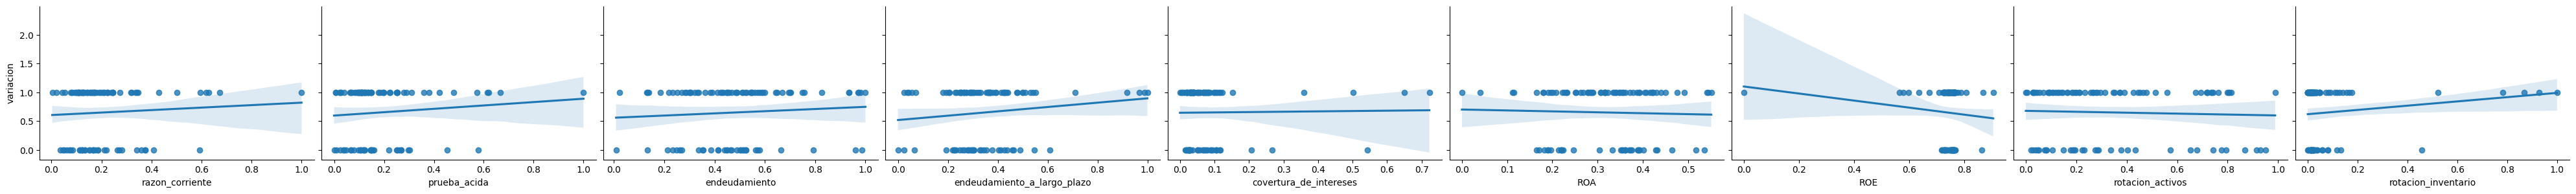

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el correlograma
sns.pairplot(dt_normalized.reset_index(), y_vars=["variacion"], x_vars=features, kind="reg", height=3, aspect=1.5)

# Mostrar el gráfico
plt.show()


In [14]:
dt.isna().sum()

company                         0
razon_corriente                 0
prueba_acida                    0
endeudamiento                   0
endeudamiento_a_largo_plazo     0
covertura_de_intereses          0
ROA                             0
ROE                             0
rotacion_activos                0
rotacion_inventario             0
variacion                      25
dtype: int64

In [15]:
dt_normalized.shape

(95, 11)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score


dt_normalized = dt_normalized[dt_normalized["variacion"].notna()]
# Separar las características (X) y el target (y)
X = dt_normalized.drop(columns=["variacion", "company"])
y = dt_normalized["variacion"]

# Dividir los datos en conjuntos de entrenamiento y prueba



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LogisticRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
acc = model.score(X_test, y_test)
print(f"Accuracy: {acc}")

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Accuracy: 0.7368421052631579
Mean Squared Error: 0.2631578947368421
R^2 Score: -0.3571428571428572


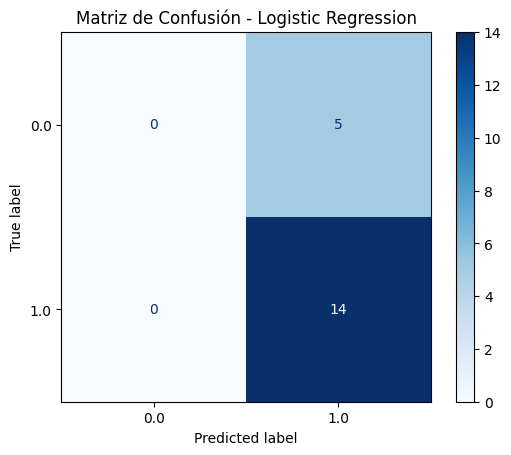

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz con etiquetas
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')

# Título del gráfico
plt.title('Matriz de Confusión - Logistic Regression')
plt.show()


In [18]:
import numpy as np
coef = model.coef_[0]
features = X_train.columns

# Crear DataFrame ordenado por importancia
importance = pd.DataFrame({'feature': features, 'importance': np.abs(coef)})
importance.sort_values(by='importance', ascending=False, inplace=True)
print(importance)

                       feature  importance
3  endeudamiento_a_largo_plazo    0.573448
8          rotacion_inventario    0.493185
7             rotacion_activos    0.486786
6                          ROE    0.298465
2                endeudamiento    0.292569
1                 prueba_acida    0.270335
5                          ROA    0.145454
4       covertura_de_intereses    0.137158
0              razon_corriente    0.035421


In [19]:
import optuna
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

def objective(trial):
    param = {
        "n_estimators": 2000,
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "num_leaves": trial.suggest_int("num_leaves", 20, 150),
        "min_child_samples": trial.suggest_int("min_child_samples", 10, 100),
        "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_loguniform("reg_alpha", 0.01, 1.0),
        "reg_lambda": trial.suggest_loguniform("reg_lambda", 0.01, 1.0),
        "verbose": -1,
    }

    model = lgb.LGBMClassifier(**param, early_stopping_rounds=50)

    model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric="auc",

    )

    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    return 1 - auc  # Minimizar: 1 - AUC

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

print("Mejores hiperparámetros:")
print(study.best_params)

[I 2025-04-22 20:55:50,775] A new study created in memory with name: no-name-f521c062-77f1-4d40-8709-ae7ba8760068
C:\Users\Usuario\AppData\Local\Temp\ipykernel_21600\147230598.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
C:\Users\Usuario\AppData\Local\Temp\ipykernel_21600\147230598.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
C:\Users\Usuario\AppData\Local\Temp\ipykernel_21600\147230598.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v

Mejores hiperparámetros:
{'learning_rate': 0.04258923703737693, 'max_depth': 5, 'num_leaves': 92, 'min_child_samples': 88, 'subsample': 0.6412162585626222, 'colsample_bytree': 0.7554101896570367, 'reg_alpha': 0.16355793308924532, 'reg_lambda': 0.35104365653789465}


In [20]:
model = lgb.LGBMClassifier(**study.best_params, early_stopping_rounds=50)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)])
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)
auc = roc_auc_score(y_test, y_pred_proba)
mse = mean_squared_error(y_test, y_pred_proba)
acc = model.score(X_test, y_test)
print(f"Accuracy: {acc}")
print(f"AUC: {auc}")
print(f"Mean Squared Error: {mse}")


[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 48, number of negative: 28
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 76, number of used features: 0
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.631579 -> initscore=0.538997
[LightGBM] [Info] Start training from score 0.538997
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] Stopped tra

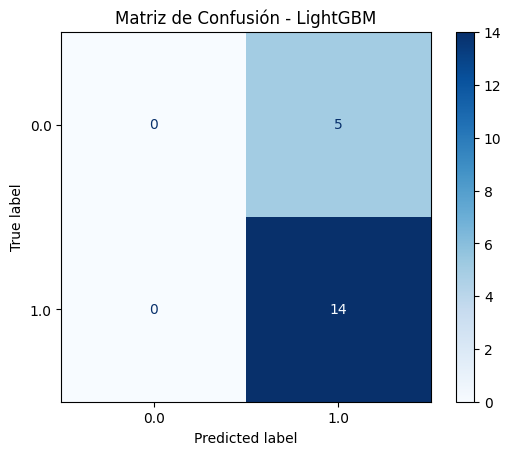

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz con etiquetas
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')

# Título del gráfico
plt.title('Matriz de Confusión - LightGBM')
plt.show()

In [ ]:
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

# Obtener importancia
importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

print(importance)

                       feature  importance
0              razon_corriente           0
1                 prueba_acida           0
2                endeudamiento           0
3  endeudamiento_a_largo_plazo           0
4       covertura_de_intereses           0
5                          ROA           0
6                          ROE           0
7             rotacion_activos           0
8          rotacion_inventario           0


In [22]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Asumimos que ya tenés tus datos en X, y
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 2, 32),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
    }

    model = RandomForestClassifier(**params, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    return acc  # Maximizar accuracy

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Mejores hiperparámetros:")
print(study.best_params)

[I 2025-04-22 20:56:37,551] A new study created in memory with name: no-name-6252ad5b-f900-4a32-b733-867173b56b41
[I 2025-04-22 20:56:37,796] Trial 0 finished with value: 0.5789473684210527 and parameters: {'n_estimators': 102, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.5789473684210527.
[I 2025-04-22 20:56:38,787] Trial 1 finished with value: 0.5789473684210527 and parameters: {'n_estimators': 470, 'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 15, 'max_features': None, 'bootstrap': False}. Best is trial 0 with value: 0.5789473684210527.
[I 2025-04-22 20:56:40,754] Trial 2 finished with value: 0.7368421052631579 and parameters: {'n_estimators': 891, 'max_depth': 12, 'min_samples_split': 12, 'min_samples_leaf': 20, 'max_features': 'log2', 'bootstrap': True}. Best is trial 2 with value: 0.7368421052631579.
[I 2025-04-22 20:56:42,060] Trial 3 finished with value: 0.5789473684210527

Mejores hiperparámetros:
{'n_estimators': 891, 'max_depth': 12, 'min_samples_split': 12, 'min_samples_leaf': 20, 'max_features': 'log2', 'bootstrap': True}


In [23]:
model = RandomForestClassifier(**study.best_params, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
print(f"Accuracy: {acc}")
print(f"Mean Squared Error: {mse}")
print(f"AUC: {auc}")


Accuracy: 0.7368421052631579
Mean Squared Error: 0.2631578947368421
AUC: 0.5


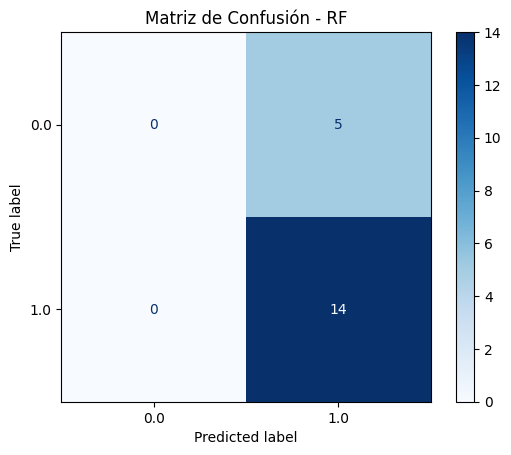

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz con etiquetas
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')

# Título del gráfico
plt.title('Matriz de Confusión - RF')
plt.show()

In [49]:
# Obtener importancia
importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

print(importance)

                       feature  importance
5                          ROA    0.178318
3  endeudamiento_a_largo_plazo    0.165147
6                          ROE    0.163121
8          rotacion_inventario    0.110436
2                endeudamiento    0.095238
4       covertura_de_intereses    0.084093
7             rotacion_activos    0.083080
1                 prueba_acida    0.063830
0              razon_corriente    0.056738
